# Project title: African Conflict Over-time: Fatality Forecasting.

## Team Name: Datamind

## Python Code 

---
## **Code flow**



1. [Data Wrangling](#wrang)
    - 1.1 [Import modules](#import)
    - 1.2 [Accessing](#access)
    - 1.3 [Cleaning](#clean)
    

2. [Exploratory Data Analysis](#eda)
   - 2.1 [Exploration](#explore)
   - 2.2 [Visualization and insights](#vis)
  
   
3. [Model Development](#mode)
    - 3.1 [Data Pre-processing](#dprep)
    - 3.2 [model training](#train)
    - 3.3 [model evaluation](#test)
    - 3.4 [model validation](#valid)
    
    
4. [Improving Model performance](#mode2)
    - 4.1 [Data Pre-processing](#prep)
    - 4.2 [Model training](#train1)
    - 4.2 [Model testing](#test1)
    - 4.4 [Model validation](#valid1)

5. [Conclusion](#con)

## 1. Data Wrangling
     1.1 Import modules
     1.2 Accessing 
     1.3 Cleaning

In this section we load in the dataset, Access and clean the data.

---

### 1.1 Import modules 


Import all relevant modules for the project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateparser
import numpy as np

# Sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import  f_regression, SelectKBest
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Personally defined module
import Useful_tools as ut

pd.set_option("display.max_columns", None)


## 1.2 Assessing 



Loading the dataset, checking the shape, duplicates, missing and so on.

In [3]:

#Changes the event date to a datetime datatype
#df1 = pd.read_csv('Africa_1997-2020_Jan08.csv', encoding = 'latin1', 
                 #parse_dates=['EVENT_DATE'], date_parser=dateparser.parse)

#No changes
df = pd.read_csv('Africa_1997-2020_Jan08.csv', encoding = 'latin1')

In [4]:
# Checking the first few lines
df.head()

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,ACTOR2,ASSOC_ACTOR_2,INTER2,INTERACTION,REGION,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
0,12,ALG1,1,01-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Tipaza,Douaouda,NaN,Douaouda,36672,2789,1,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5,1582579226
1,12,ALG2,2,02-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Relizane,Mazouna,NaN,Hassasna,36133,883,1,Algeria Watch,Other,Two citizens were beheaded in Hassasna.,2,1582579226
2,12,ALG3,3,03-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Saida,Youb,NaN,Hassi El Abed,34966,-29,1,Algeria Watch,Other,Two citizens were killed in a raid on the vill...,2,1582579226
3,12,ALG4,4,04-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Blida,Blida,NaN,Blida,36469,2829,1,Algeria Watch,Other,4 January: 16 citizens were murdered in the vi...,16,1582579226
4,12,ALG5,5,05-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,Civilians (Algeria),NaN,7,27,Northern Africa,Algeria,Tipaza,Douaouda,NaN,Douaouda,36672,2789,1,Algeria Watch,Other,5 January: Killing of 18 citizens in the Olivi...,18,1582579226


In [5]:
# Checking the shape of the data
df.shape

(65535, 29)

In [6]:
# Checking the datatype of each columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ISO               65535 non-null  int64 
 1   EVENT_ID_CNTY     65535 non-null  object
 2   EVENT_ID_NO_CNTY  65535 non-null  int64 
 3   EVENT_DATE        65535 non-null  object
 4   YEAR              65535 non-null  int64 
 5   TIME_PRECISION    65535 non-null  int64 
 6   EVENT_TYPE        65535 non-null  object
 7   SUB_EVENT_TYPE    65535 non-null  object
 8   ACTOR1            65535 non-null  object
 9   ASSOC_ACTOR_1     12768 non-null  object
 10  INTER1            65535 non-null  int64 
 11  ACTOR2            50346 non-null  object
 12  ASSOC_ACTOR_2     11167 non-null  object
 13  INTER2            65535 non-null  int64 
 14  INTERACTION       65535 non-null  int64 
 15  REGION            65535 non-null  object
 16  COUNTRY           65535 non-null  object
 17  ADMIN1      

In [7]:
#Checking for duplicated values
df.duplicated().sum()

0

In [8]:
# Checking out the unique count of just the categorical features
cat = []
num = []
for i in df.columns:
    if df[i].dtype == 'O':
        cat.append(i)
    else: num.append(i)
df[cat].nunique().sort_values()

REGION                5
EVENT_TYPE            6
COUNTRY              20
SOURCE_SCALE         23
SUB_EVENT_TYPE       25
ADMIN1              317
ACTOR2             1402
ACTOR1             1645
ADMIN2             1832
ASSOC_ACTOR_1      1866
ASSOC_ACTOR_2      2069
ADMIN3             2672
SOURCE             4129
EVENT_DATE         8244
LOCATION           8381
NOTES             55547
EVENT_ID_CNTY     65535
dtype: int64

In [9]:
# All numerical features do not contain any missing value
df.isna().sum()

ISO                     0
EVENT_ID_CNTY           0
EVENT_ID_NO_CNTY        0
EVENT_DATE              0
YEAR                    0
TIME_PRECISION          0
EVENT_TYPE              0
SUB_EVENT_TYPE          0
ACTOR1                  0
ASSOC_ACTOR_1       52767
INTER1                  0
ACTOR2              15189
ASSOC_ACTOR_2       54368
INTER2                  0
INTERACTION             0
REGION                  0
COUNTRY                 0
ADMIN1                  0
ADMIN2                  0
ADMIN3              13204
LOCATION                0
LATITUDE                0
LONGITUDE               0
GEO_PRECISION           0
SOURCE                  0
SOURCE_SCALE            0
NOTES                2604
FATALITIES              0
TIMESTAMP               0
dtype: int64

In [10]:
# Checking out the percentage of missing values
(df.isnull().sum()/df.shape[0] * 100)[df.isnull().sum() > 0 ] 

ASSOC_ACTOR_1    80.517281
ACTOR2           23.176928
ASSOC_ACTOR_2    82.960250
ADMIN3           20.148013
NOTES             3.973449
dtype: float64

In [11]:
# Taking a sneekpeek at the Notes feature
list(df['NOTES'].iloc[:5].values)

['5 January: Beheading of 5 citizens in Douaouda (Tipaza).',
 'Two citizens were beheaded in Hassasna.',
 'Two citizens were killed in a raid on the village of Hassi El Abd. Several televisions were destroyed and the school of the village burned.',
 '4 January: 16 citizens were murdered in the village of Benachour (Blida) by masked men a few hundred meters away from a military camp. It is of note that the citizens of this village had refused to set up armed militias.',
 '5 January: Killing of 18 citizens in the Oliviers district of Douaouda (Tipaza). Among the victims are 3 children and 6 women. This region had refused to organise armed militias.']

In [12]:
# A look at the region column count
df[['REGION']].groupby('REGION')['REGION'].count()

REGION
Eastern Africa     15592
Middle Africa      33945
Northern Africa     9936
Southern Africa       77
Western Africa      5985
Name: REGION, dtype: int64

## 1.3 Cleaning 

Aside some text features, most of the features in the dataset are well structures and clean with no missing values. The dataset does not contain any duplicated values. 
The following text features contains missing values which we will fill with empty space.

>ASSOC_ACTOR_1    80.517281

>ACTOR2           23.176928

>ASSOC_ACTOR_2    82.960250

>ADMIN3           20.148013

>NOTES             3.973449

## 2. Exploratory Data Analysis
    2.1 Exploration
    2.2 Visualization and insights
    
In this section, we performed exploratory data analysis to answer the following questions:

> 1. Which year did Africa suffered its highest casualities and which region/country was most affected?

> 2. Which Event/Sub event type are likely to lead to more casualities in each country?

> 3. 
    
   ---

## 1.  Which year did Africa suffered its highest casualities and which region/country was most affected?

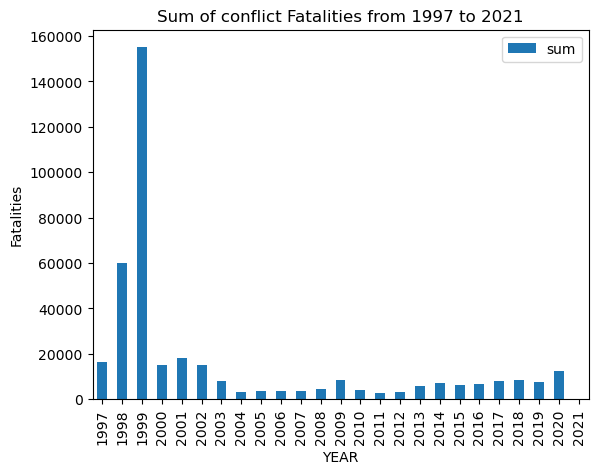

In [13]:
y=df.groupby('YEAR')['FATALITIES'].agg(['sum']).plot(kind='bar', ylabel=('Fatalities'))
plt.title("Sum of conflict Fatalities from 1997 to 2021")
plt.show()

African suffered most of her casulaities in 1999 which followed by 1998. 2004 to 2008 there was less conflict casualites. Next we look at the region that suffered most casualities.

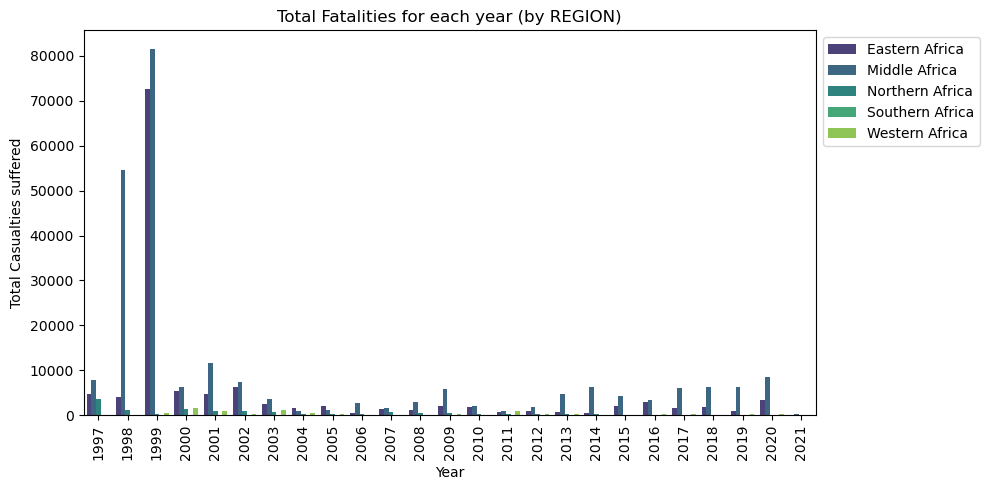

In [14]:
df_fatal_year1 = df.groupby(['YEAR', 'REGION'])['FATALITIES'].agg(['sum'])
df_fatal_year1 = df_fatal_year1.reset_index()
plt.figure(figsize=(10, 5)) 
ax = sns.barplot(x='YEAR', y='sum', data=df_fatal_year1, hue='REGION', palette='viridis')
ax.set_title('Total Fatalities for each year (by REGION)')
ax.set_xlabel('Year')
ax.set_ylabel('Total Casualties suffered')
plt.xticks(rotation=90)
ax.legend(bbox_to_anchor= (1,1))

plt.tight_layout()

plt.show()


The Eastern and the central africa appears to suffer the most casualities every year with the deadliest year being 1999. Central Africa suffred heavy losses in 1998 and 1999.  Next we look at the countries in Easter and central Africa that was most affected.

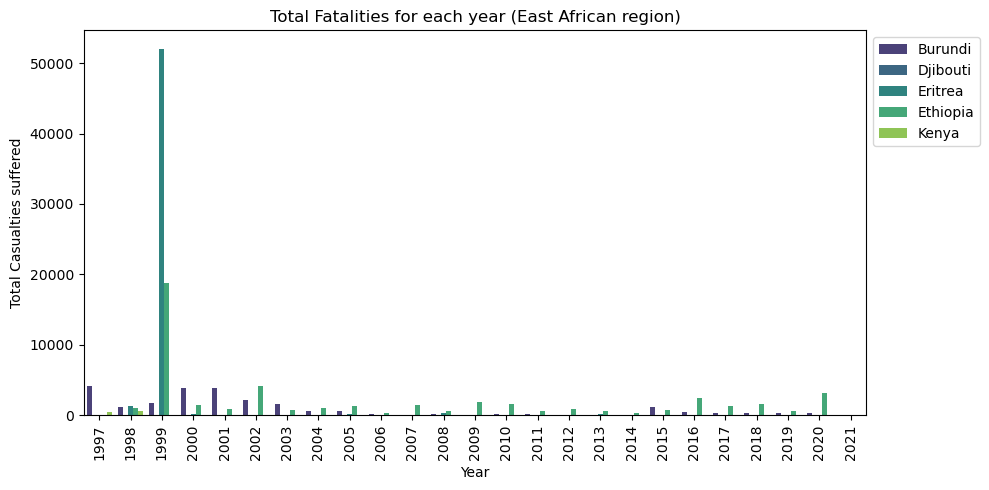

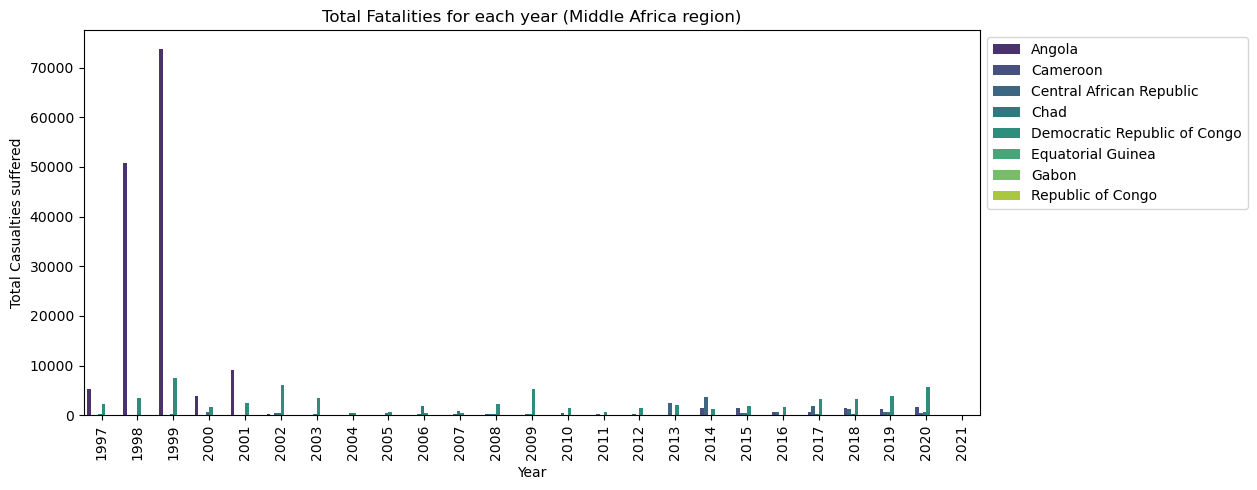

In [15]:
df_reg1 = df[df["REGION"]=="Eastern Africa"]
df_reg2 = df[df["REGION"]=="Middle Africa"]
df_reg_year1 = df_reg1.groupby(['YEAR', 'COUNTRY'])['FATALITIES'].agg(['sum'])
df_reg_year1 = df_reg_year1.reset_index()
plt.figure(figsize=(10, 5)) 
g=sns.barplot(x='YEAR', y='sum', data=df_reg_year1, hue='COUNTRY', palette='viridis')
g.set_title('Total Fatalities for each year (East African region)')
g.set_xlabel('Year')
g.set_ylabel('Total Casualties suffered')
plt.xticks(rotation=90)
g.legend(bbox_to_anchor= (1,1))
plt.tight_layout()
plt.figure(figsize=(10, 5)) 
ax2 = plt.gca()


df_reg_year2 = df_reg2.groupby(['YEAR', 'COUNTRY'])['FATALITIES'].agg(['sum'])
df_reg_year2 = df_reg_year2.reset_index()
g2=sns.barplot(x='YEAR', y='sum', data=df_reg_year2, hue='COUNTRY', palette='viridis')
g2.set_title('Total Fatalities for each year (Middle Africa region)')
g2.set_xlabel('Year')
g2.set_ylabel('Total Casualties suffered')
plt.xticks(rotation=90)
plt.tight_layout()
g2.legend(bbox_to_anchor= (1,1))
plt.show()

In East Africa, Eritrea and Ethiopia were the most affected. The two countries suffered heavy losses in 1999. With Eritrea suffering the most. Investigating further, we get to know that Eritrea and Ethiopia were engaged in a confliict in the year 1999  [Source](https://en.wikipedia.org/wiki/Eritrean%E2%80%93Ethiopian_War#:~:text=With%20Eritrea's%20refusal%20to%20accept,a%20claim%20it%20later%20withdrew.). This is known as  the Badme War. It was a major armed conflict between Ethiopia and Eritrea that took place from May 1998 to June 2000 and lots of casualities were reported.


In the Central Africa region, Angola suffered most conflict casualities in 1998 and 1999. This is because Angola was still in the middle of a civil war which started years before then [Source](https://sites.tufts.edu/atrocityendings/2015/08/07/angola-civil-war/). 

"In 1998, the then President Dos Santos thus initiated an armed offensive against UNITA which is a group known as the rebels. Both the Angolan government and UNITA engaged in scorched-earth offensives, siege warfare and other tactics that primarily targeted civilians. UNITA in particular aimed to push civilian populations into government-held cities in order to stress the government’s capacity to protect its citizens."
[Source](https://sites.tufts.edu/atrocityendings/2015/08/07/angola-civil-war/).

At the end 1999, the cpountry was filled with lots of landmines which endangered citizens in the area.

## 2. Which Event/Sub event type are likely to lead to more casualities in each country?

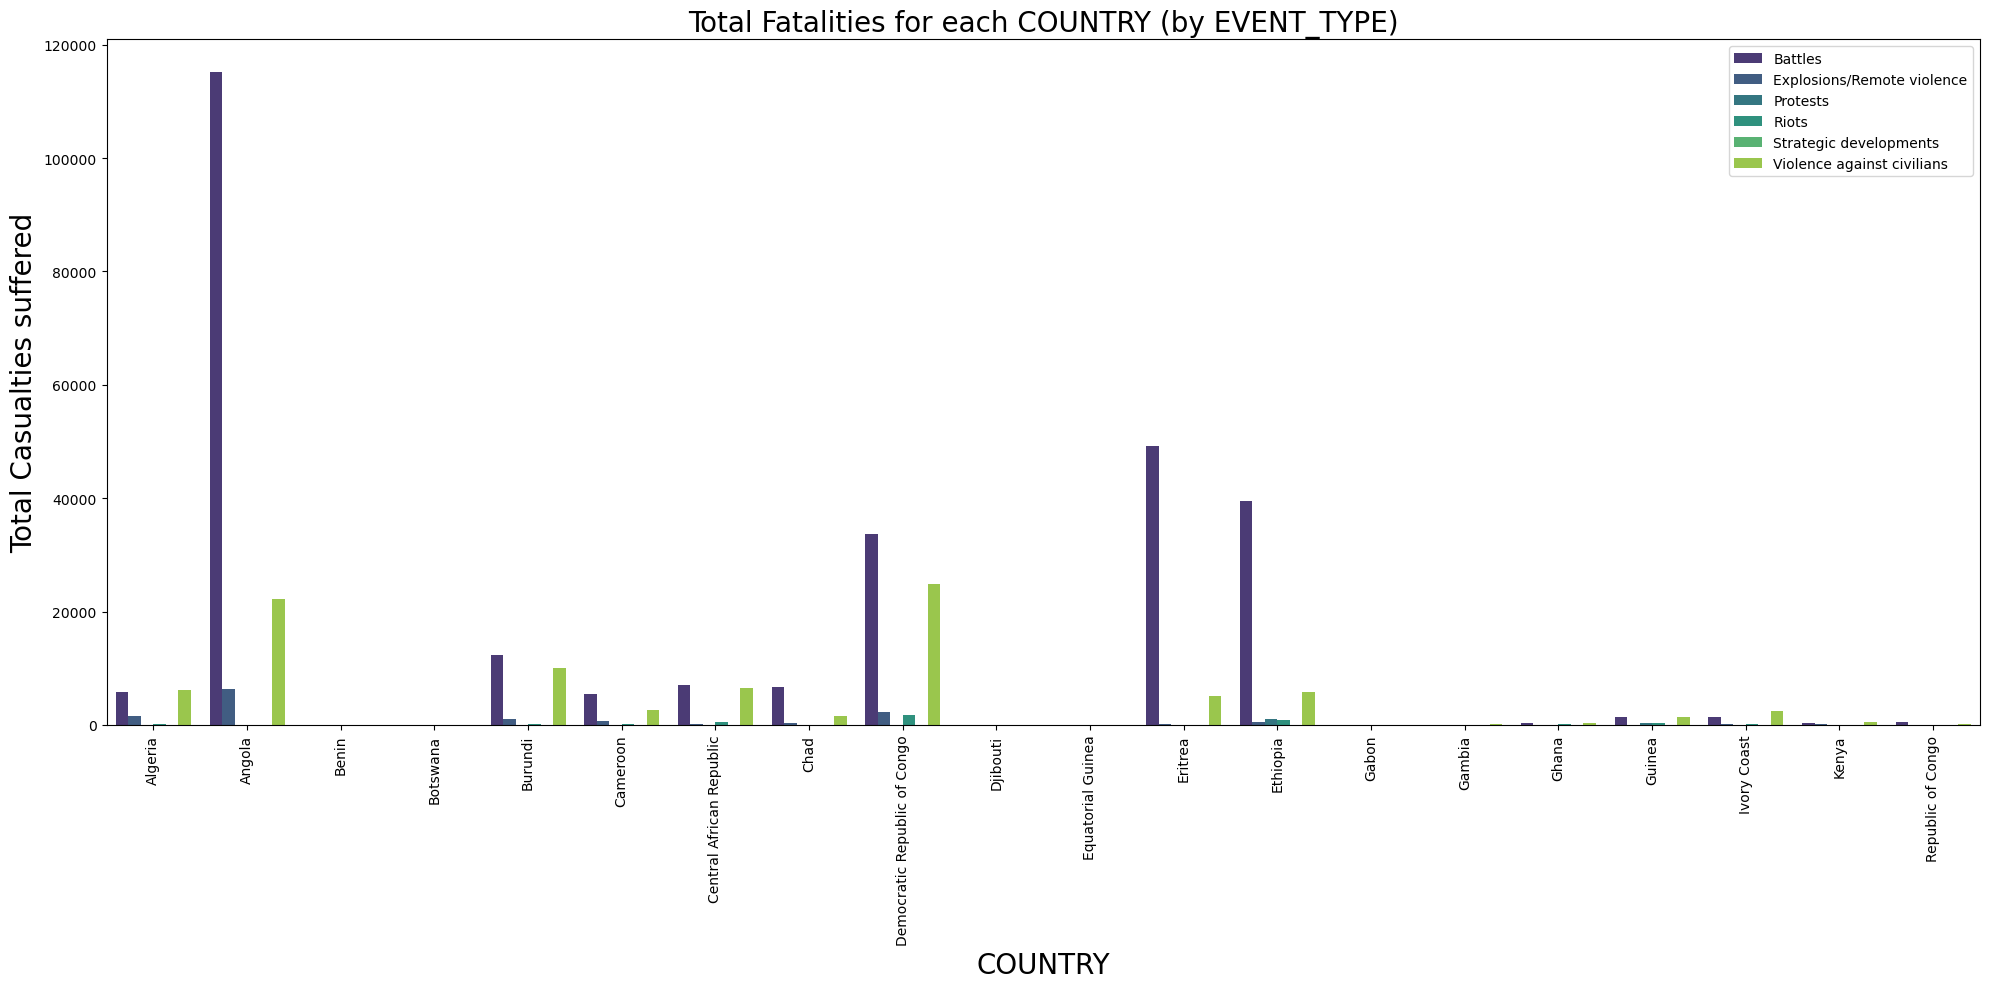

In [16]:
plt.figure(figsize=(20, 10)) 
df_fatal_year2 = df.groupby(['COUNTRY', 'EVENT_TYPE'])['FATALITIES'].agg(['sum'])
df_fatal_year2 = df_fatal_year2.reset_index()
ax1=sns.barplot(x='COUNTRY', y='sum', data=df_fatal_year2, hue='EVENT_TYPE', palette='viridis')
ax1.set_title('Total Fatalities for each COUNTRY (by EVENT_TYPE)',fontsize=20)
ax1.set_xlabel('COUNTRY',fontsize=20)
ax1.set_ylabel('Total Casualties suffered', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
ax1.legend(bbox_to_anchor= (1,1))
plt.show()

From the graph above, we observe that Most of the countries suffered more casualities in the hands of battles. This is followed by violence against civilians and some riots as in the case of DRC. Next we further investigate which sub event types leads to more casualities.

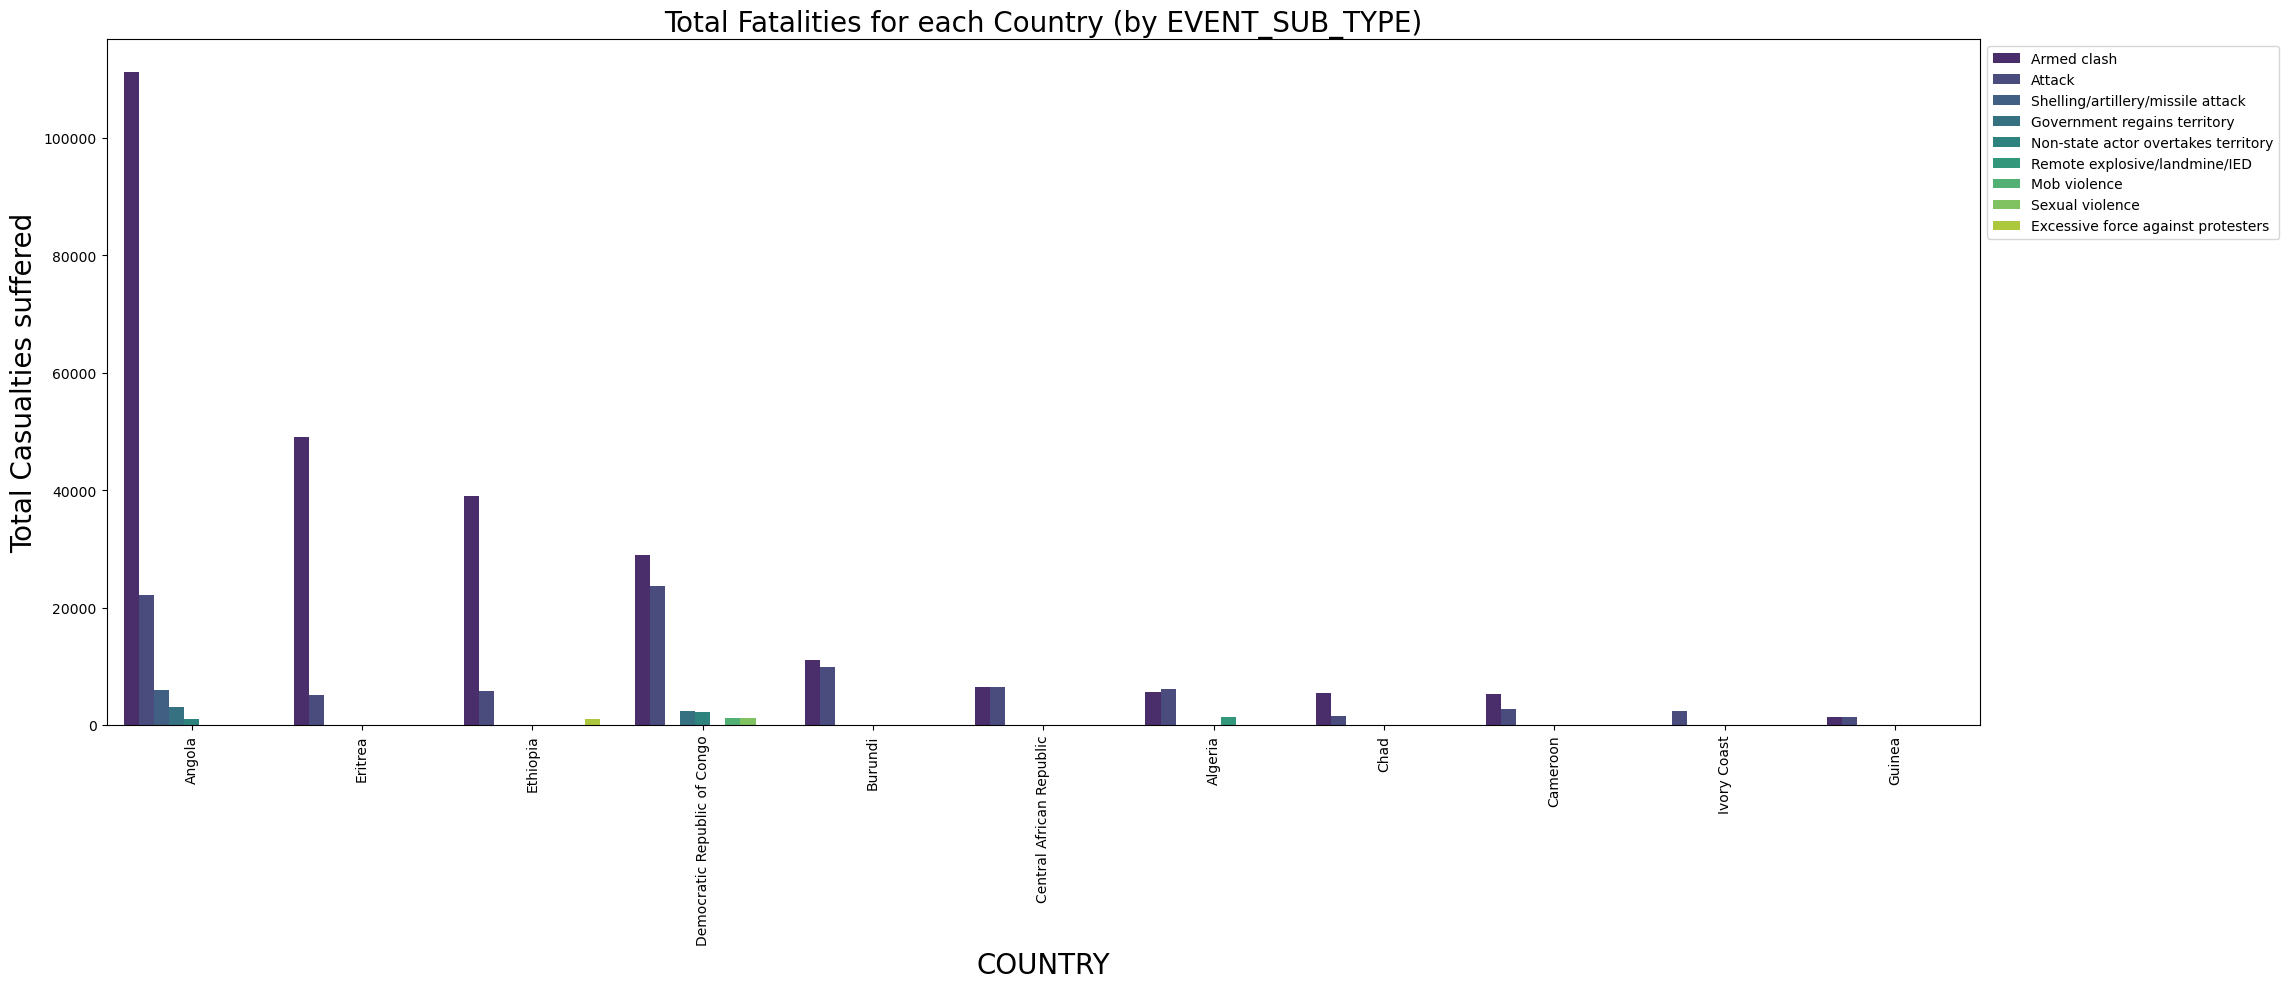

In [17]:

plt.figure(figsize=(20, 10)) 

df_fatal_year2 = df.groupby(['COUNTRY', 'SUB_EVENT_TYPE'])['FATALITIES'].agg(['sum']).nlargest(30, columns=["sum"])

df_fatal_year2 = df_fatal_year2.reset_index()
ax1=sns.barplot(x='COUNTRY', y='sum', data=df_fatal_year2, hue='SUB_EVENT_TYPE', palette='viridis')
ax1.set_title('Total Fatalities for each Country (by EVENT_SUB_TYPE)', fontsize=20)
ax1.set_xlabel('COUNTRY', fontsize=20)
ax1.set_ylabel('Total Casualties suffered', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
ax1.legend(bbox_to_anchor= (1,1))

plt.show()
plt.show()



Our plot shows that Armed clash and Attacks accounts for majority of casualities in the various countries. This is because the frequency of armed clashes and attacks in Africa is the highest among the sub event type as shown in the plot below.

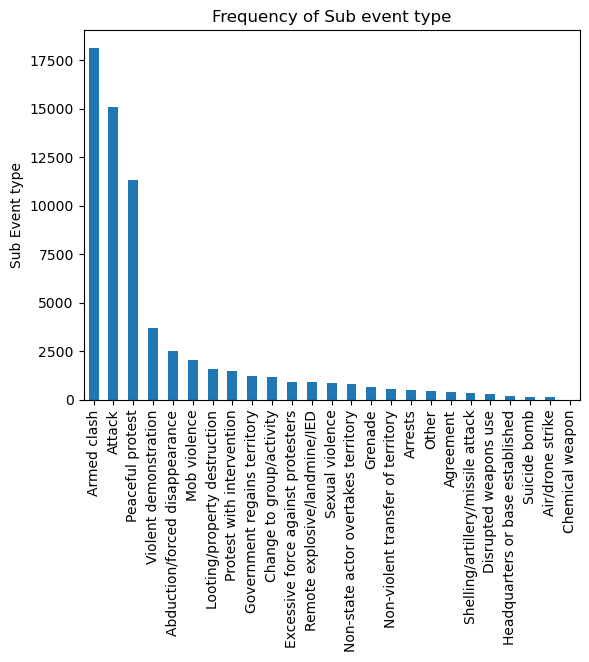

In [18]:
df['SUB_EVENT_TYPE'].value_counts().plot(kind = 'bar')
plt.ylabel("Frequency")
plt.ylabel("Sub Event type")
plt.title("Frequency of Sub event type")
plt.show()

The plot shows more of occurence of Armed clashes and attack in Africa. Now lets see Which sub event type has the maximum number of casualities at an instance.

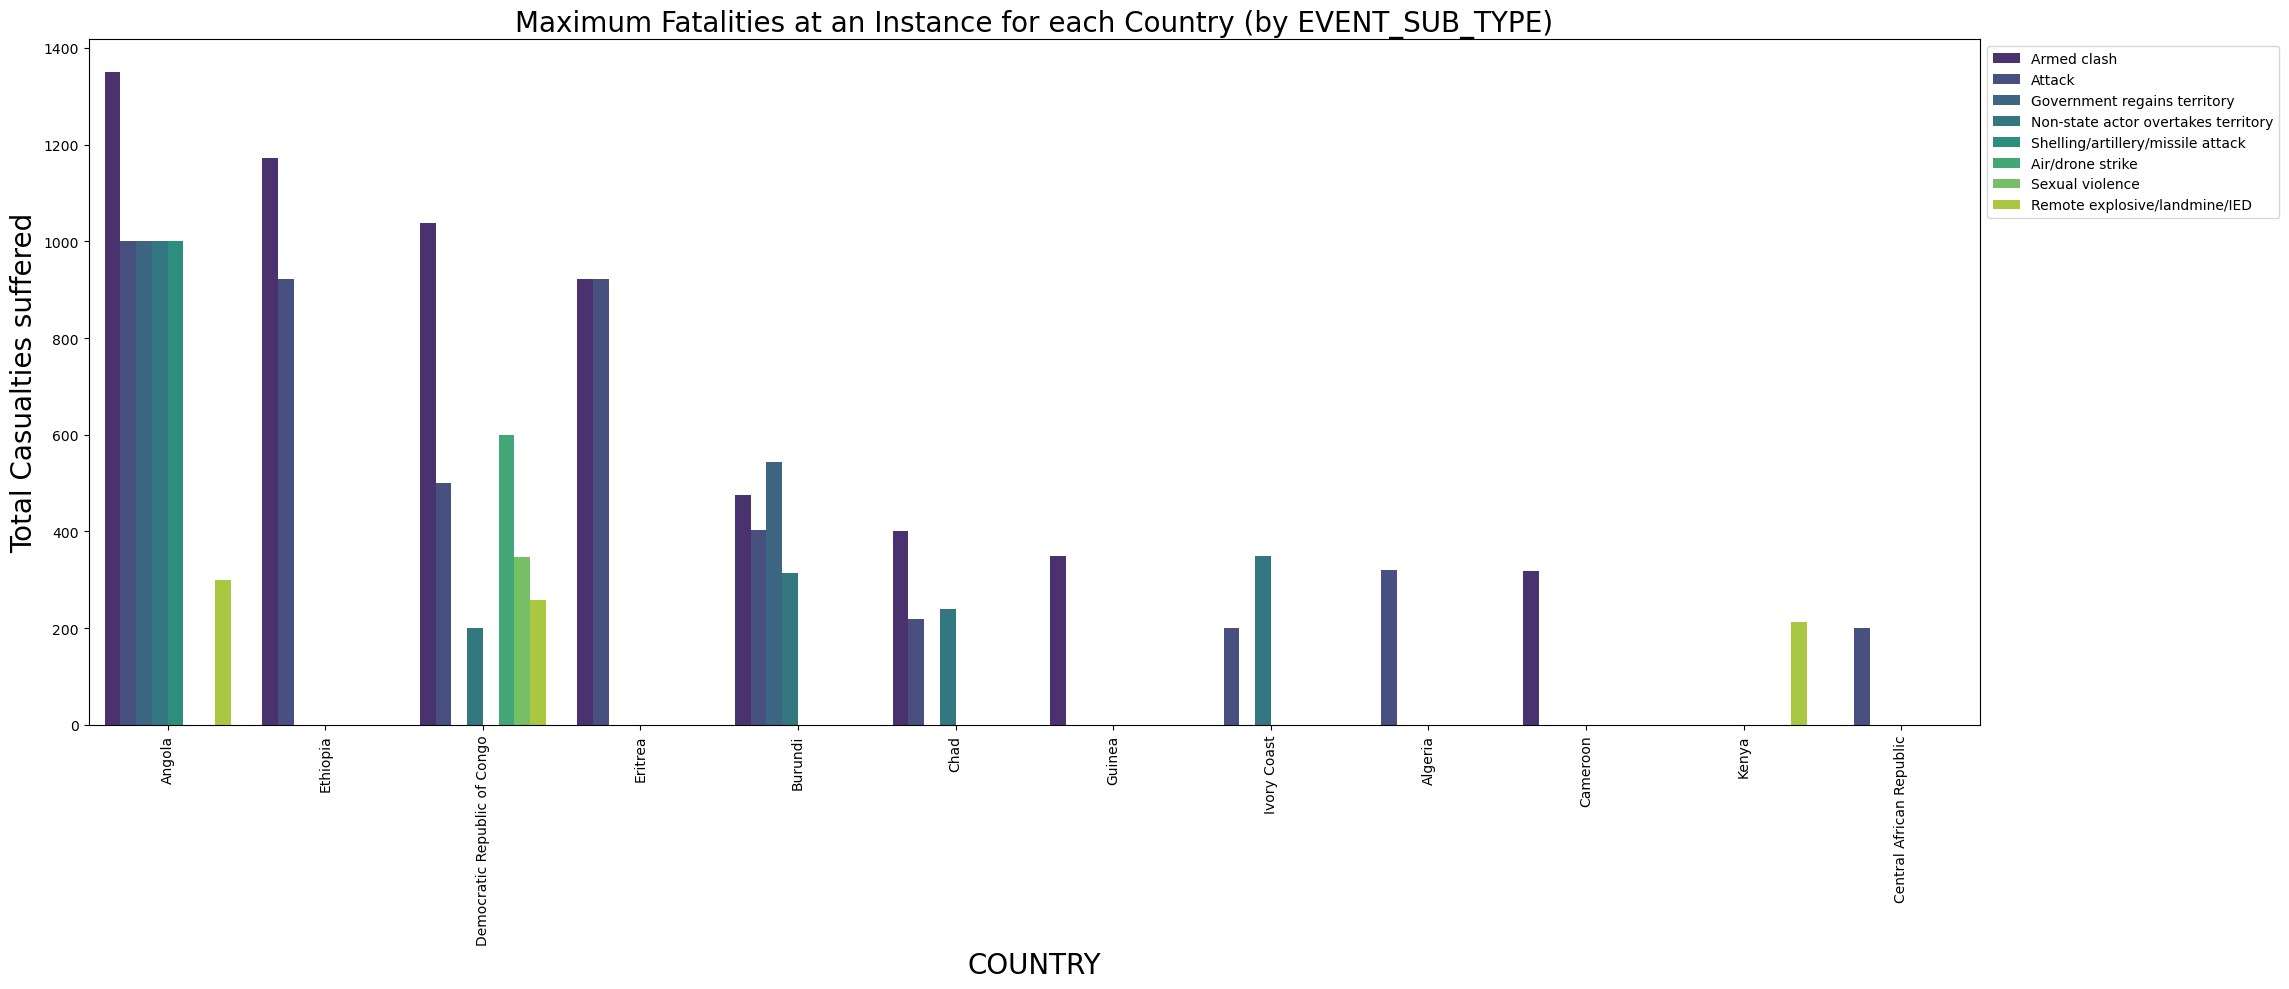

In [19]:
plt.figure(figsize=(20, 10)) 

df_fatal_year2 = df.groupby(['COUNTRY', 'SUB_EVENT_TYPE'])['FATALITIES'].agg(['max']).nlargest(30, columns=["max"])

df_fatal_year2 = df_fatal_year2.reset_index()
ax1=sns.barplot(x='COUNTRY', y='max', data=df_fatal_year2, hue='SUB_EVENT_TYPE', palette='viridis')
ax1.set_title('Maximum Fatalities at an Instance for each Country (by EVENT_SUB_TYPE)', fontsize=20)
ax1.set_xlabel('COUNTRY', fontsize=20)
ax1.set_ylabel('Total Casualties suffered', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
ax1.legend(bbox_to_anchor= (1,1))


plt.show()

While armed clashes still takes the lead, we see that Angola has equaly endured heavy casualities from several event types. 

   
## 3. Model Development
    3.1 Data Pre-processing
    3.2 model training
    3.3 model evaluation
    3.4 model validation

### 3.1 Data Pre-processing

In [20]:
#Numeric columns
num_list= ["YEAR", "INTER1", "INTER2", 
           "INTERACTION", "LATITUDE", "LONGITUDE", "GEO_PRECISION" ]

#Convert to List
numeric_data_only = df[num_list]

In [21]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(df[num_list],df["FATALITIES"],test_size=0.3,random_state=42)

### 3.2 model training

In [22]:
# Instantiate Linear Regression model
model = LinearRegression()

In [23]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Perform prediction with it
y_pred = model.predict(X_test)

### 3.3 model evaluation

In [25]:
# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
mae

11.17353491719403

In [26]:
# Root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

51.791728104622685

In [27]:
# R2- score
r2= r2_score(y_test, y_pred)
r2

0.02482171489958307

    
## 4. Improving Model performance
    4.1 Data Pre-processing
    4.2 Model training
    4.2 Model evaluating
    4.4 Model validation
    
    
    
***Here we incoporate the text columns into our prediction using natural language processing tools such as:

        *** HashingVectorizer
        *** N-gram of words
        
***The numeric and text columns were incoperated using the Function transformer and the feature union tool.

***We next built a machine learning pipeline where we defined the follwoing:

    *** SelectKBest: A dimension reduction technique using `f_regression` as the statistical metric and we considered the 10 best features.
    *** SparseInteractions: A class which defines polynomial interaction method. We have specified polynomial degree of 2.
    *** MaxAbsScale: We used this tool to scale the features such that the value ranges between 0 and 1.

### 4.1 Data Pre-processing

In [28]:
# Extract the numeric columns
numerical_cols= ["ISO","EVENT_ID_NO_CNTY","YEAR","TIME_PRECISION", "INTER1", "INTER2", 
           "INTERACTION", "LATITUDE", "LONGITUDE", "GEO_PRECISION", "TIMESTAMP" ]
target=["FATALITIES"]


#define the columns to drop
drop = numerical_cols + target

In [29]:
def merged_text(df, cols_to_drop = drop):
    """ converts all text columns in each row
    of dataframe to single vector """
    
    # Drop numerical columns that are in the dataframe
    cols_to_drop = set(cols_to_drop) & set(df.columns.tolist())
    text_data = df.drop(cols_to_drop, axis=1)
    
    # Replace missing values with empty space
    text_data.fillna("", inplace=True)
    
    # Join all text columns in a row using the space in between
    merged_text_cols = text_data.apply(lambda x: " ".join(x), axis=1)
    return merged_text_cols

In [30]:
get_text_data = FunctionTransformer(merged_text, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[numerical_cols], validate=False)

In [31]:
# Select K best features
K = 10
Alpha_nemric_tokens = '[A-Za-z0-9]+(?=\\s+)'

In [32]:
# Instantiate pipeline
pipeline = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data)
                   
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vect', HashingVectorizer(token_pattern=Alpha_nemric_tokens,
                                                       norm=None,binary=False,
                                                     ngram_range=(1,2))),
                    ('dimension_reduction', SelectKBest(score_func=f_regression, k=K))
                ]))
             ]
        )),
        ('interaction', ut.SparseInteractions(degree=2)),
        ('feature_scale', MaxAbsScaler()),
        ('model', LinearRegression())
    ])

In [33]:
# Drop the target column
X = df.drop(columns=["FATALITIES"])
# Extract only the target column
y = df["FATALITIES"]

X_tr, X_te, y_tr, y_te = train_test_split(X,y, random_state=42)

### 4.2 Model training

In [34]:
# Here we fit our pipeline
pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('union',
                 FeatureUnion(transformer_list=[('numeric_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7feac1b8b490>))])),
                                                ('text_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function merged_text at 0x7feac1b8b130>)),
                                                                 ('vect',
                                                                  HashingVectorizer(ngram_range=(1,
                                                                                                 2),
                                                                                    norm=None,
                                                                                    token_pattern='[A-Za-z0-9]+(?=\\s+)')),
                                                                 ('dimension_reduction',
                                                                  SelectKBest(score_func=<function f_regression at 0x7feac93c53f0>))]))])),
                ('interaction', SparseInteractions()),
                ('feature_scale', MaxAbsScaler()),
                ('model', LinearRegression())])

In [35]:
# We make predictions with our pipeline 
pred = pipeline.predict(X_te)

### 4.2 Model evaluating

In [36]:
# The root mean squared error
RMSE = np.sqrt(mean_squared_error(y_te, pred))
RMSE

15.790000750486108

In [37]:
# The mean absolute error
mae = mean_absolute_error(y_te, pred)
mae

4.674018363748015

In [38]:
# The r2- score
r2= r2_score(y_te, pred)
r2

0.9027005210703778

### 4.4 Model validation 
Cross-validation to prevent overfitting

In this section, we performed the cross validation technique just to make sure our model is not overfitted.

In [39]:
# Defining our scoring metrics
scoring = {'r2': 'r2', 'mse': 'neg_mean_squared_error', 'mae': 'neg_mean_absolute_error'}

# Performing the cross validation
results = cross_validate(pipeline, X_tr, y_tr, scoring=scoring, cv=5)

# Extracting the results for each metric
r2_scores = results['test_r2']
mse_scores = -results['test_mse']  
mae_scores = -results['test_mae']  

In [40]:
r2_scores

array([0.80745366, 0.86595519, 0.80846346, 0.86326857, 0.90501041])

In [41]:
rmse_scores = np.sqrt(mse_scores)
rmse_scores

array([24.99881683, 22.71803466, 23.85886712, 20.75862242, 17.67979496])

In [42]:
mae_scores

array([4.91437674, 4.78993064, 4.92388119, 5.1038869 , 5.00175567])